In [1]:
from pathlib import Path
import pickle

In [2]:
destFolder = Path('/Volumes/CREST Data/David_S_Data/Cori_Data/TJU-001/TJU-P01-V2-CEUS_12.32.11')
dataName = 'TJU-P01-V2-CEUS_12.32.11_mf_sip_capture_50_2_1_0.raw'

In [3]:
from tqdm import tqdm

resFile = open(Path(destFolder) / Path("bmode_volume_dims.pkl"), mode='rb')
orgres = pickle.load(resFile)
resFile.close()

numFrames = 0
for file in Path(destFolder).iterdir():
    if file.name.startswith("bmode_frame") and file.name.endswith(".pkl"):
        numFrames += 1

timeSeriesVols = []
for frameNum in tqdm(range(numFrames)):
    f = open(Path(destFolder) / Path(f"ceus_frame_{frameNum}.pkl"), mode='rb')
    timeSeriesVols.append(pickle.load(f))
    f.close()

100%|██████████| 451/451 [01:50<00:00,  4.08it/s]


In [4]:
import numpy as np
dataNibImg = np.transpose(timeSeriesVols)
del timeSeriesVols

In [5]:
import matplotlib.pyplot as plt
vol = 56
axCenter = dataNibImg.shape[2]//2

In [8]:
dataNibImg.shape

(500, 178, 20, 451)

0.0 0.0


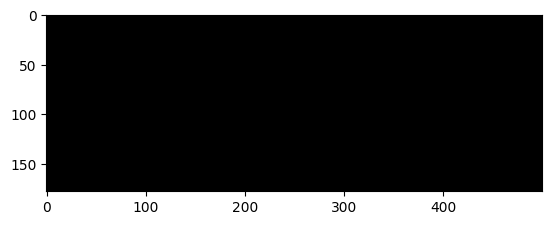

In [6]:
arr = np.fliplr(np.rot90(dataNibImg[:, :, axCenter, vol], k=3))
print(np.amax(arr), np.amin(arr))
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
# plt.imshow(arr, cmap='gray')

In [10]:
from pyquantus.parse.transforms import scanConvert

In [121]:
NonLinThr=3.5e4; NonLinDiv=1.7e4

width = 70; startDepth = 0.1; endDepth = 0.16; desiredHeight = 500
startDepth = 9.625000000000217e-03
endDepth = 1.106916250000000e+02

startAngle = -7.713848837209303e-01
endAngle = 7.350844186046512e-01
width = np.degrees(abs(startAngle) + abs(endAngle))

singleVol = dataNibImg[:,:,:,vol]
scans = []
for scan in range(singleVol.shape[2]):
    arr = np.fliplr(np.rot90(dataNibImg[:, :, scan, vol], k=3))
    out, _, _ = scanConvert((arr-NonLinThr)*255/NonLinDiv, width, startDepth, endDepth, desiredHeight)
    scans.append(out.scArr)

In [122]:
arr3d = np.transpose(scans)

In [123]:
arr3d.shape, singleVol.shape

((815, 500, 20), (216, 480, 20))

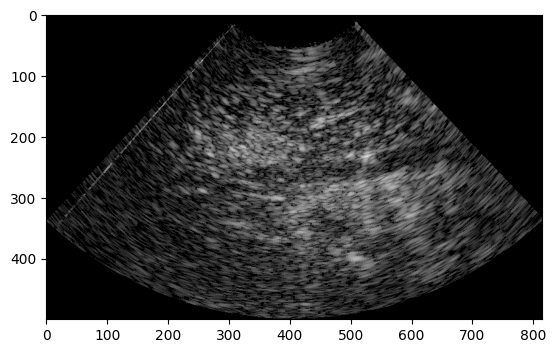

In [124]:
plt.imshow(np.fliplr(np.rot90(arr3d[:,:,axCenter], 3)), cmap='gray', vmin=0, vmax=255)

221.685 -525.0


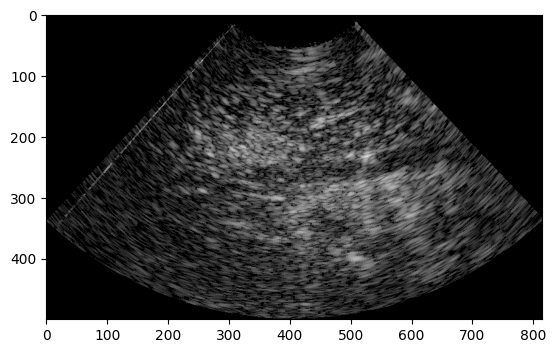

In [120]:
NonLinThr=3.5e4; NonLinDiv=1.7e4

width = 70; startDepth = 0.04; endDepth = 0.16; desiredHeight = 500

startDepth = 9.625000000000217e-03
endDepth = 1.106916250000000e+02

startAngle = -7.713848837209303e-01
endAngle = 7.350844186046512e-01
width = np.degrees(abs(startAngle) + abs(endAngle))

arr = np.fliplr(np.rot90(dataNibImg[:, :, axCenter, vol], k=3))
arr, _, _ = scanConvert((arr - NonLinThr)*255/NonLinDiv, width, startDepth, endDepth, desiredHeight)
arr = arr.scArr
print(np.amax(arr), np.amin(arr))
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
# plt.imshow(arr, cmap='gray')